In [4]:
#Breanna Powell
#Code adapted from https://blog.logrocket.com/email-spam-detector-python-machine-learning/
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

spam = pd.read_csv('spam.csv')
x = spam['email']
y = spam["label"]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2)

cv = CountVectorizer()
features = cv.fit_transform(x_train)

model = svm.SVC()
model.fit(features,y_train)

features_test = cv.transform(x_test)
print(model.score(features_test,y_test))

0.9820627802690582


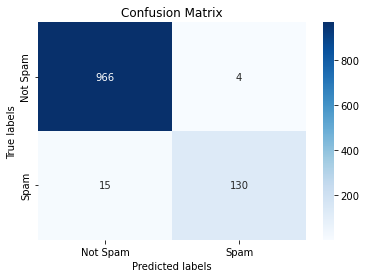

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt

model = SGDClassifier()
model.fit(features,y_train)

features_test = cv.transform(x_test)

y_predict = model.predict(features_test)
#print(model.score(features_test,y_test))

cf_matrix =confusion_matrix(y_test,y_predict)

ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);